*ML -Model - Sales data process on dataset*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("retail_sales_dataset.csv")
print(df.head)

<bound method NDFrame.head of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  24-11-2023     CUST001    Male   34           Beauty   
1                 2  27-02-2023     CUST002  Female   26         Clothing   
2                 3  13-01-2023     CUST003    Male   50      Electronics   
3                 4  21-05-2023     CUST004    Male   37         Clothing   
4                 5  06-05-2023     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  16-05-2023     CUST996    Male   62         Clothing   
996             997  17-11-2023     CUST997    Male   52           Beauty   
997             998  29-10-2023     CUST998  Female   23           Beauty   
998             999  05-12-2023     CUST999  Female   36      Electronics   
999            1000  12-04-2023    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  

In [4]:
print(df.info())  # Date column should now be 'datetime64[ns]'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [5]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y") 

In [6]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB
None


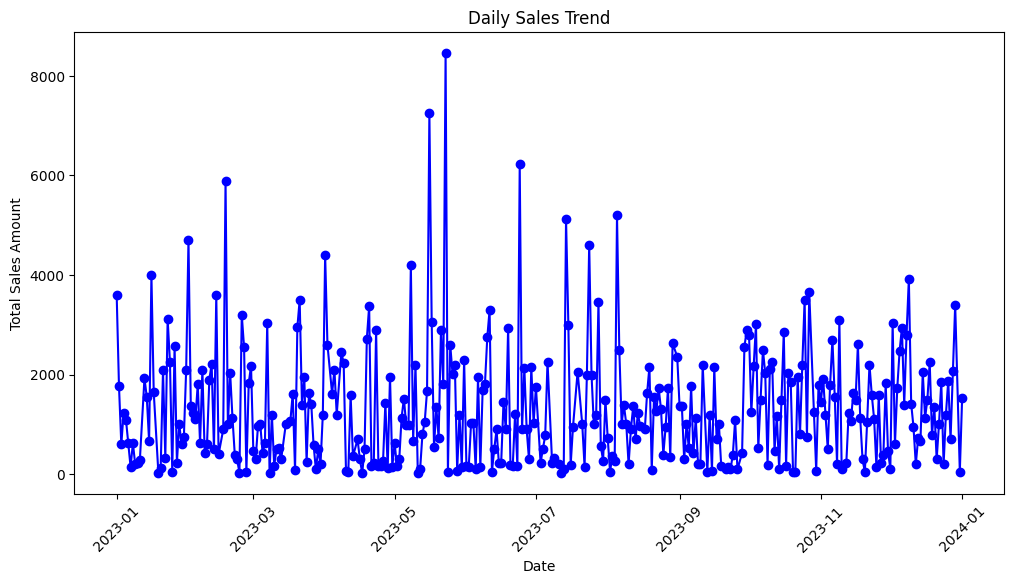

In [7]:
df_grouped = df.groupby("Date")["Total Amount"].sum()

plt.figure(figsize=(12,6))
plt.plot(df_grouped.index,df_grouped.values,marker = "o",linestyle = "-",color = "b")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.title("Daily Sales Trend")
plt.xticks(rotation=45)
plt.show()

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


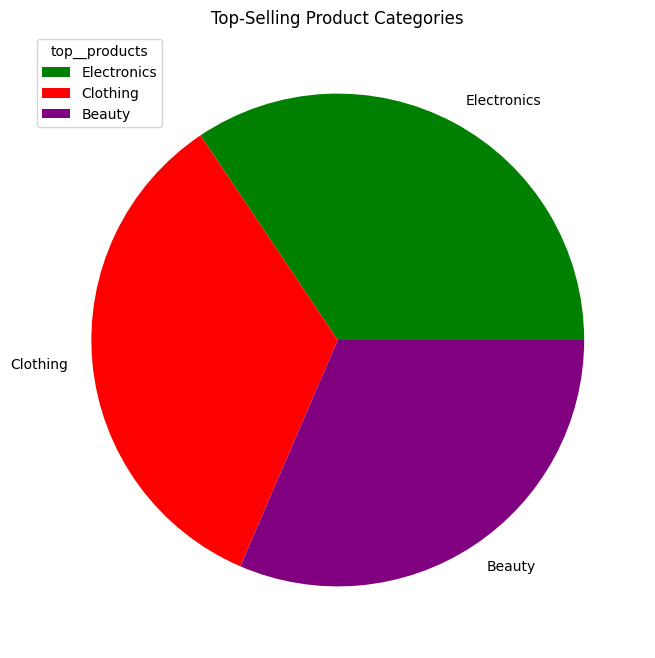

In [8]:
# Top  products
top__products = df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False)
print(top__products.head(5))
plt.figure(figsize=(8, 8))
plt.pie(top__products,labels=top__products.index, colors=["green", "red", "purple"])
plt.legend(title= "top__products", loc ="best")
plt.title("Top-Selling Product Categories")
plt.show()

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


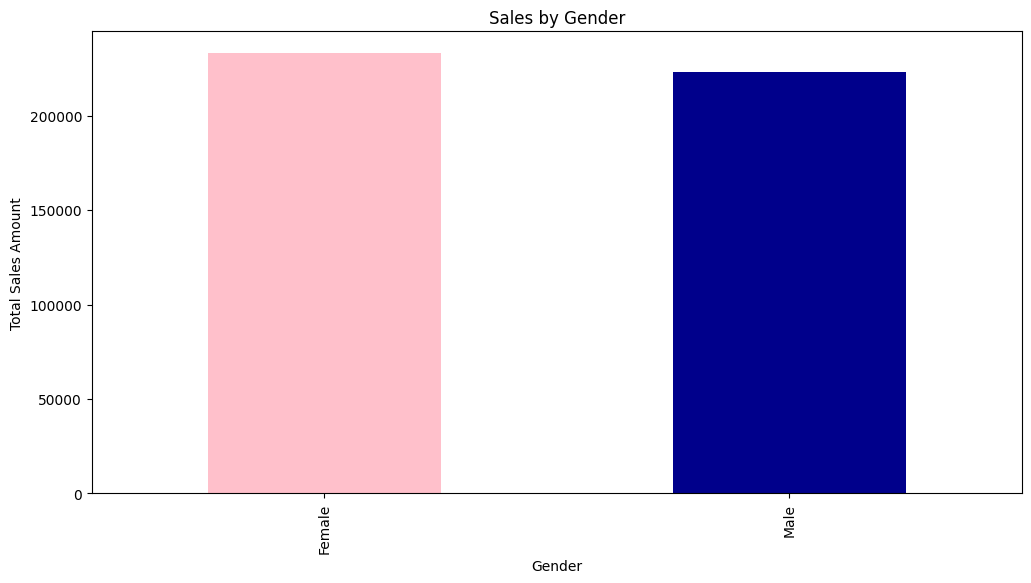

In [9]:
sales_by_gender = df.groupby("Gender")["Total Amount"].sum()
print(sales_by_gender.head(5))

plt.figure(figsize=(12,6))
sales_by_gender.plot(kind="bar",color=["pink","darkblue"])
plt.title("Sales by Gender")
plt.ylabel("Total Sales Amount")
plt.show()

In [ ]:
# ML -Model - Sales data process on dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df["Date"] = pd.to_datetime(df["Date"])
df_grouped = df.groupby("Date")["Total Amount"].sum().reset_index()
df_grouped["Days"] = (df_grouped["Date"] - df_grouped["Date"].min()).dt.days

X = df_grouped[["Days"]]
y = df_grouped["Total Amount"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


future_days = pd.DataFrame({"Days": range(df_grouped["Days"].max() + 1, df_grouped["Days"].max() + 31)})
future_sales = model.predict(future_days)

future_dates = pd.date_range(df_grouped["Date"].max() + pd.Timedelta(days=1), periods=30)
future_df = pd.DataFrame({"Date": future_dates, "Predicted Sales": future_sales[:30]})

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_grouped, x="Date", y="Total Amount", label="Actual Sales", marker="o",color="darkblue")
sns.lineplot(data=future_df, x="Date", y="Predicted Sales", label="Predicted Sales", linestyle="dashed", marker="o",color="red")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.title("Sales Forecast for the Next 30 Days")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'df' is not defined